In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(10,10))

In [14]:
dt=pd.read_csv('alquilerResidencialSinOutLiers.csv',sep=';')
dt.head()

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
1,Casa,Lince,4,1,2,400,12000.0,0.0,0.0,30.00,Casa
2,Casa,Santa Anita,2,0,0,51,1500.0,50.0,0.0,29.41,Casa
3,Casa,San Luis,8,3,5,259,7000.0,0.0,0.0,27.03,Casa
4,Casa,Breña,1,0,0,33,1200.0,0.0,0.0,36.36,Casa


In [15]:
#creamos un area donde pondremos 4 graficos
area=plt.figure()

<Figure size 1000x1000 with 0 Axes>

In [16]:
#aqui creamos los graficos dentro de esa area, le adicionamos al area los 4 graficos,debemos indicarle que tendra dos columnas y dos filas y la posicion del grafico
g1=area.add_subplot(2,2,1)
g2=area.add_subplot(2,2,2)
g3=area.add_subplot(2,2,3)
g4=area.add_subplot(2,2,4)


In [17]:
#listo ahora creamos cada uno de los graficos,el primero sera un grafico de dispersion,debemos pasarle dos columnas para medir,seran las columnas de Valor y Area
g1.scatter(dt.Valor,dt.Area)
g1.set_title('Valor x Area')

#g2 sera un histograma
g2.hist(dt.Valor)
g2.set_title('Histograma')

#g3 sera un grafico de lineas aleatorias,osea le pasamos filas de forma aleatoria desde nuestro df,con sample() sacamos las lineas aleatorias, y con plot() los graficamos
datosg3=dt.Valor.sample(100)
datosg3.index=range(datosg3.shape[0])#aqui generamos los indices desde cero para este grupo de filas aleatorias
g3.plot(datosg3)
g3.set_title('Muestra Valor')

#g4 sera un grafico de barras, se hace con el metodo bar(), creamos primero un objeto para alimentar este grafico
grupo=dt.groupby('Tipo')['Valor']
label=grupo.mean().index
valores=grupo.mean().values
g4.bar(label,valores)
g4.set_title('Valor medio por tipo')

Text(0.5, 1.0, 'Valor medio por tipo')

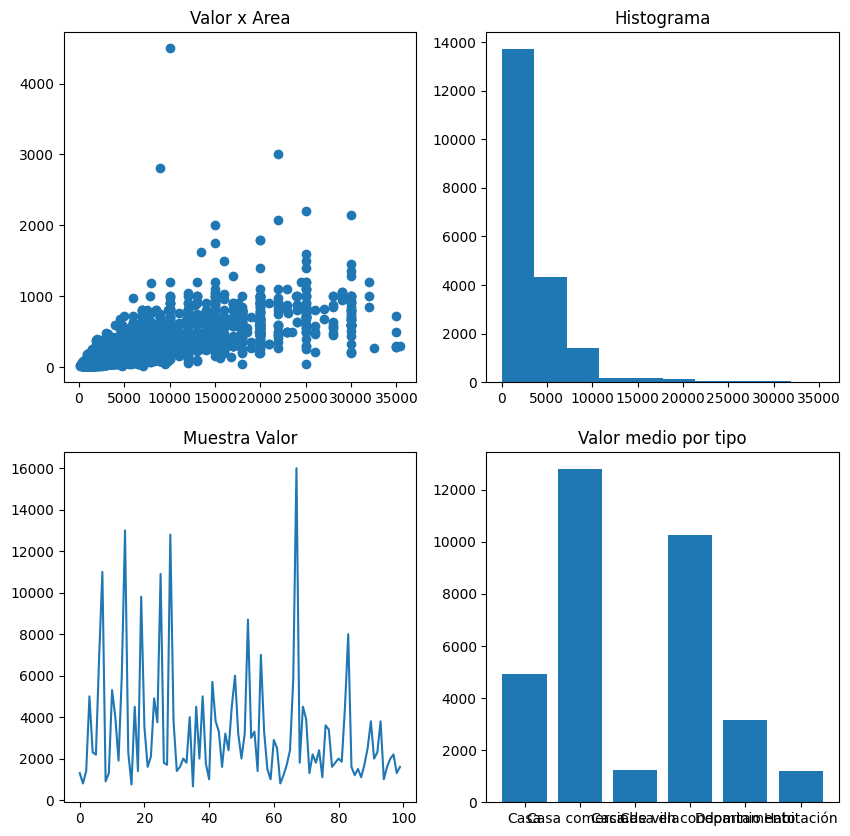

In [18]:
#listo,ya configuramos el area,para mostrar los graficos simplemente mostramos el area
area

In [19]:
#listo,puedo salvar estos graficos con savefig() y le puedo especificar un nombre a esta area, los pixeles,y un borde.
area.savefig('grafico.png',dpi=300,bbox_inches='tight')